## Performance Over Time
How does mental health performance vary over time?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/CitieSHealth_BCN_DATA_PanelStudy_20220414.csv')
df.head()

,ID_Zenodo,date_all,year,month,day,dayoftheweek,hour,mentalhealth_survey,occurrence_mental,bienestar,...,education,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans
0,71,22190,2020,10,2,4,18,Yes,1.0,9.0,...,Universitario,Ha empeorado mucho,Ha empeorado mucho,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo igual que antes
1,112,22202,2020,10,14,2,22,Yes,2.0,8.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,NaN,Lo utilizo más que antes,Lo utilizo menos que antes
2,110,22217,2020,10,29,3,18,Yes,10.0,9.0,...,Universitario,Ha empeorado mucho,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes
3,115,22222,2020,11,3,1,18,Yes,14.0,3.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo menos que antes
4,135,22231,2020,11,12,3,22,Yes,12.0,9.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,No ha cambiado,NaN,NaN,Lo utilizo menos que antes,Lo utilizo más que antes


In [3]:
df.columns

Index(['ID_Zenodo', 'date_all', 'year', 'month', 'day', 'dayoftheweek', 'hour',
       'mentalhealth_survey', 'occurrence_mental', 'bienestar', 'energia',
       'estres', 'sueno', 'horasfuera', 'actividadfisica', 'ordenador',
       'dieta', 'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor',
       'stroop_test', 'occurrence_stroop', 'mean_incongruent', 'correct',
       'response_duration_ms', 'performance', 'mean_congruent',
       'inhib_control', 'z_performance', 'z_mean_incongruent',
       'z_inhib_control', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h',
       'no2gps_12h', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30',
       'no2gps_24h_x30', 'min_gps', 'hour_gps', 'pm25bcn', 'BCμg',
       'sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day',
       'hours_noise_55_day', 'hours_noise_65_day', 'hours_greenblue_day',
       'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h',
       'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary',
     

To examine and graph variables over time, I create a column called 'datetime,' which combines year, month, and day into a pandas datetime object. 

In [4]:
df['datetime'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str) + df['day'].astype(str), format='%Y%m%d')
df.head()

,ID_Zenodo,date_all,year,month,day,dayoftheweek,hour,mentalhealth_survey,occurrence_mental,bienestar,...,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans,datetime
0,71,22190,2020,10,2,4,18,Yes,1.0,9.0,...,Ha empeorado mucho,Ha empeorado mucho,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo igual que antes,2020-10-02
1,112,22202,2020,10,14,2,22,Yes,2.0,8.0,...,Ha empeorado mucho,Ha empeorado un poco,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,NaN,Lo utilizo más que antes,Lo utilizo menos que antes,2020-10-14
2,110,22217,2020,10,29,3,18,Yes,10.0,9.0,...,Ha empeorado mucho,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes,2020-10-29
3,115,22222,2020,11,3,1,18,Yes,14.0,3.0,...,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo menos que antes,2020-11-03
4,135,22231,2020,11,12,3,22,Yes,12.0,9.0,...,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,No ha cambiado,NaN,NaN,Lo utilizo menos que antes,Lo utilizo más que antes,2020-11-12


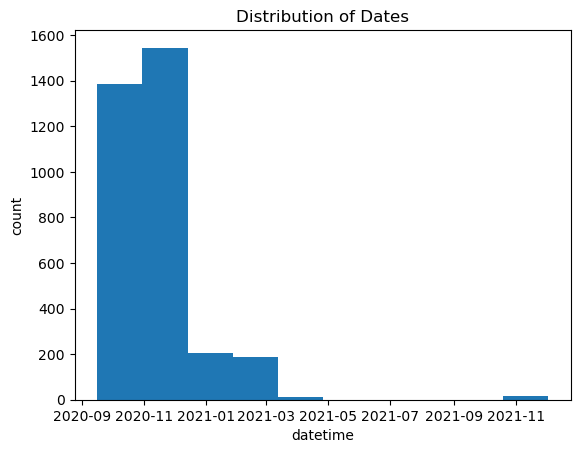

In [5]:
plt.hist(df['datetime'])
plt.xlabel('datetime')
plt.ylabel('count')
plt.title('Distribution of Dates');

plt.savefig('outputs/dates_performance')

Looking at the ID column, most people appear multiple times in the dataset. I take the 5 individuals with the most entries in the dataset and plot their performance over time. 

In [6]:
df['ID_Zenodo'].value_counts()

86     20
216    17
79     16
98     16
201    15
       ..
198     3
49      3
36      2
126     2
173     1
Name: ID_Zenodo, Length: 288, dtype: int64

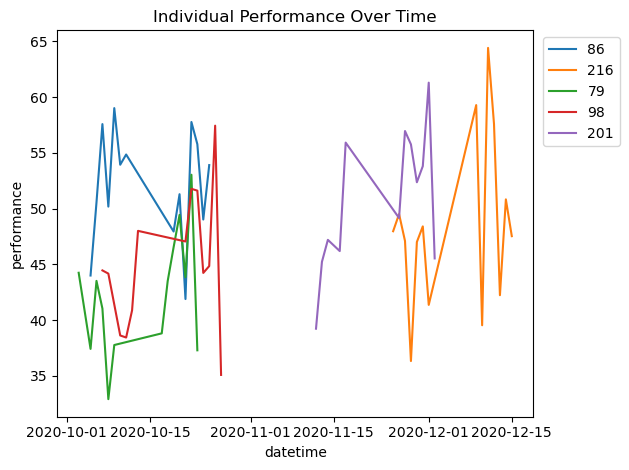

In [28]:
for i in [86, 216, 79, 98, 201]:
    sns.lineplot(x='datetime', y='performance', data = df[df['ID_Zenodo'] == i], label=str(i))
    plt.legend(loc=(1.02, 0.7))
    plt.title('Individual Performance Over Time');
    
plt.tight_layout()
plt.savefig('outputs/ind_performance', bbox_inches='tight')

The first thing I notice when plotting performance by individuals over time is that individuals are recorded over different periods of time. Performance moves up and down for each individual. Next, I plot the mean performance for all individuals over time.

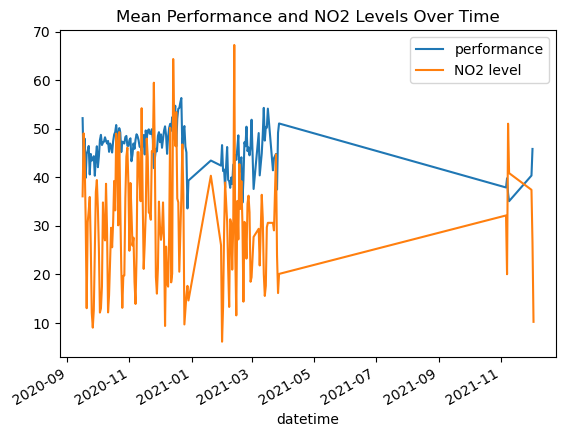

In [20]:
df.groupby('datetime')['performance'].mean().plot()
df.groupby('datetime')['no2bcn_24h'].mean().plot(label='NO2 level')
plt.title('Mean Performance and NO2 Levels Over Time')
plt.legend();

plt.savefig('outputs/mean_performance')

In [10]:
df.columns

Index(['ID_Zenodo', 'date_all', 'year', 'month', 'day', 'dayoftheweek', 'hour',
       'mentalhealth_survey', 'occurrence_mental', 'bienestar', 'energia',
       'estres', 'sueno', 'horasfuera', 'actividadfisica', 'ordenador',
       'dieta', 'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor',
       'stroop_test', 'occurrence_stroop', 'mean_incongruent', 'correct',
       'response_duration_ms', 'performance', 'mean_congruent',
       'inhib_control', 'z_performance', 'z_mean_incongruent',
       'z_inhib_control', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h',
       'no2gps_12h', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30',
       'no2gps_24h_x30', 'min_gps', 'hour_gps', 'pm25bcn', 'BCμg',
       'sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day',
       'hours_noise_55_day', 'hours_noise_65_day', 'hours_greenblue_day',
       'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h',
       'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary',
     

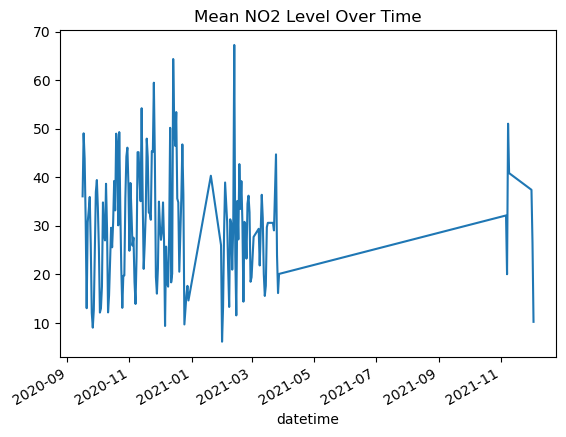

In [14]:
df.groupby('datetime')['no2bcn_24h'].mean().plot()
plt.title('Mean NO2 Level Over Time');

plt.savefig('outputs/mean_NO2')

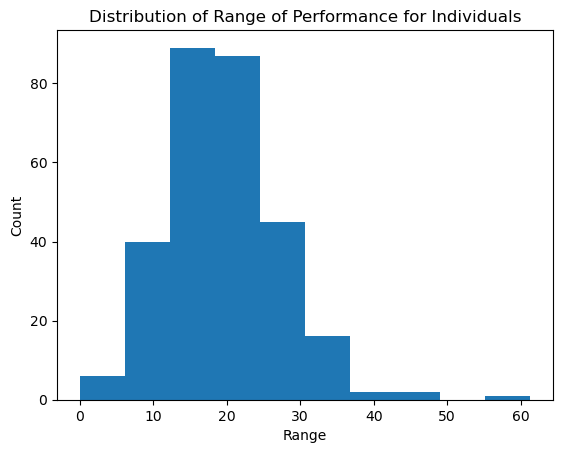

In [14]:
df['range'] = df.groupby('ID_Zenodo')['performance'].max() - df.groupby('ID_Zenodo')['performance'].min()
plt.hist(df['range'])
plt.title('Distribution of Range of Performance for Individuals')
plt.xlabel('Range')
plt.ylabel('Count')

plt.savefig('outputs/range_performance')

In [100]:
df['range'].mean()

19.567674889347973

The graph above shows the distribution of the difference between the maximum and minimum performance score per individual - what is the range of performance range for individuals. The mean is around 20, which means that the the mental health performance ranges quite a bit for each individual on average.

In [11]:
# df.columns

In [9]:
# plt.hist(df['age_yrs']);

In [10]:
# df['gender'].value_counts().plot(kind='bar');

In [12]:
# sns.barplot(x=df['age_yrs'], y=df['performance']);